### <font color = 'green'>Introduction

The diseases of affected cotton plant are divided into 4 classes as below


<font color='red'><b>class_labels = ['Diseased cotton leaf','Diseased cotton plant','Fresh cotton leaf','Fresh cotton plant']

Deep learning is a powerful tool that allows us to analyze and process large amounts of data, making it a valuable approach for disease detection in cotton leaves and plants. In this project, i aim to develop a deep learning model that can accurately detect and diagnose diseases in cotton leaves and plants.

#### <font color = 'green'>Importing Necessary Dependencies

In [7]:
from tensorflow.keras import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Dropout
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Create an instance of the VGG16 model with pre-trained weights and removing the final fully connected layer.
vgg = VGG16(include_top=False,weights='imagenet',input_shape=(224,224,3))


In [4]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [9]:
# Freeze the weights of the VGG16 model
vgg.trainable = False


In [6]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

### <font color = 'green'>Building neural network for model

In [7]:
# Initialize a sequential model
model = Sequential()

# Add the VGG16 model as the first layer
model.add(vgg)

# Flatten the output of the VGG16 model
model.add(Flatten())

# Add a dense layer with 512 units and ReLU activation
model.add(Dense(512,activation='relu'))

# Add the final dense layer for classification with 4 units and softmax activation
model.add(Dense(4,activation='softmax'))


In [8]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

### <font color = 'green'>Building a Image data generator

In [9]:
train_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/train'
val_path = '/kaggle/input/cotton-disease-dataset/Cotton Disease/val'

In [10]:
# Create an ImageDataGenerator object for data augmentation
train_data = ImageDataGenerator(rescale=1/255.,
                               rotation_range=40,
                               horizontal_flip=True,
                               shear_range=0.3,
                               zoom_range=0.2)


In [11]:
# Create a generator for the training data
train_generator = train_data.flow_from_directory(train_path,
                                                class_mode='categorical',
                                                target_size=(224,224),
                                                 batch_size=128
                                                )


Found 1951 images belonging to 4 classes.


In [12]:
val_data = ImageDataGenerator(rescale=1/255.)

In [13]:
val_generator = val_data.flow_from_directory(val_path,
                                            class_mode='categorical',
                                            batch_size=128,
                                            target_size=(224,224))

Found 253 images belonging to 4 classes.


In [14]:
# Get a random image and label from the generator
img,label = train_generator.__next__()

### <font color = 'green'>Cross checking Images and Labels from Each batch

[0. 1. 0. 0.]
1
Diseased cotton plant


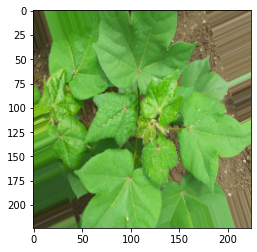

In [15]:
# Import the random module and matplotlib.pyplot
import random
import matplotlib.pyplot as plt

# Get a random index
i = random.randint(0,127)

# Display the image
plt.imshow(img[i])

# Print the label
print(label[i])

# Define class labels
class_labels = ['Diseased cotton leaf','Diseased cotton plant','Fresh cooton leaf','Fresh cotton plant']

# Get the index of the class with the highest probability
print(label[i].argmax())

# Print the class label
print(class_labels[label[i].argmax()])


### <font color = 'green'>Fitting the model

In [17]:
# Train the model on the training data and validate on the validation data
history = model.fit(train_generator,validation_data=val_generator,epochs=9)


Epoch 1/9
16/16 [==============================] - 38s 2s/step - loss: 0.7399 - accuracy: 0.7678 - val_loss: 0.4726 - val_accuracy: 0.8419
Epoch 2/9
16/16 [==============================] - 37s 2s/step - loss: 0.3895 - accuracy: 0.8396 - val_loss: 0.2505 - val_accuracy: 0.9091
Epoch 3/9
16/16 [==============================] - 41s 2s/step - loss: 0.2627 - accuracy: 0.8954 - val_loss: 0.2319 - val_accuracy: 0.9091
Epoch 4/9
16/16 [==============================] - 38s 2s/step - loss: 0.2267 - accuracy: 0.9129 - val_loss: 0.2016 - val_accuracy: 0.9249
Epoch 5/9
16/16 [==============================] - 37s 2s/step - loss: 0.2010 - accuracy: 0.9236 - val_loss: 0.1861 - val_accuracy: 0.9328
Epoch 6/9
16/16 [==============================] - 37s 2s/step - loss: 0.2040 - accuracy: 0.9236 - val_loss: 0.2436 - val_accuracy: 0.8933
Epoch 7/9
16/16 [==============================] - 38s 2s/step - loss: 0.1681 - accuracy: 0.9395 - val_loss: 0.2372 - val_accuracy: 0.8933
Epoch 8/9
16/16 [==========

### <font color = 'green'>Model Metrics

In [18]:
# Extract the training and validation loss and accuracy values from the history object
loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']


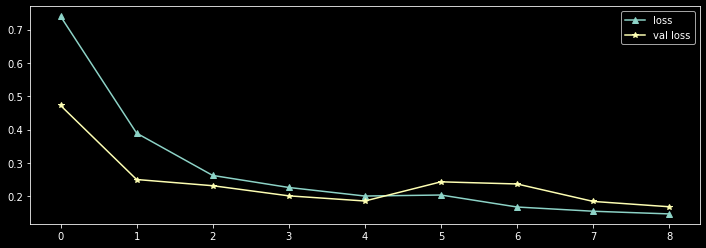

In [24]:
# Plotting Loss and Validation Loss over epochs
plt.style.use('dark_background')
plt.figure(figsize=(12,4))
plt.plot(loss,label='loss',marker='^')
plt.plot(val_loss,label='val loss',marker='*')
plt.legend()
plt.show()



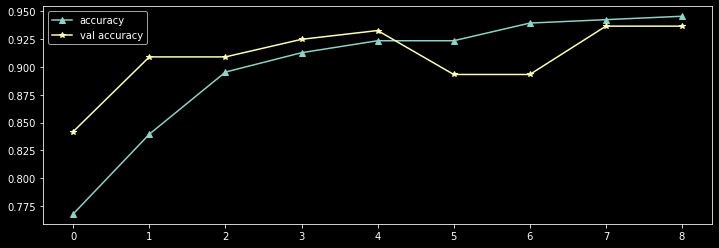

In [25]:
 # Plotting accuracy and validation accuracy on epochs
plt.style.use('dark_background')
plt.figure(figsize=(12,4))
plt.plot(accuracy,label='accuracy',marker='^')
plt.plot(val_accuracy,label='val accuracy',marker='*')
plt.legend()
plt.show()

### <font color = 'green'>Model Evaluation

In [26]:
model.evaluate(val_generator)

2/2 [==============================] - 2s 966ms/step - loss: 0.1689 - accuracy: 0.9368


[0.1688811480998993, 0.9367588758468628]

loss = 0.168
accuracy = 0.936

In [ ]:
# saving the model
model.save('Cotton_disease_predictor.h5')

In [11]:
import keras
model = keras.models.load_model('Cotton_disease_predictor.h5')

### <font color = 'green'>Model prediction on real life data

1/1 [==============================] - 0s 211ms/step


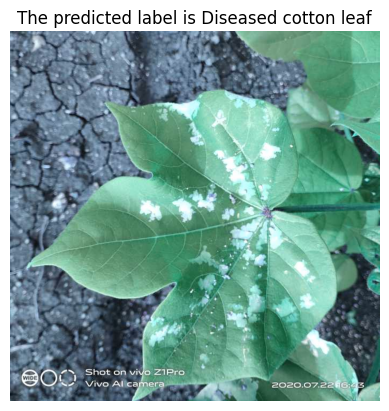

In [15]:
# Import opencv and numpy
import cv2
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the class labels
class_labels = ['Diseased cotton leaf','Diseased cotton plant','Fresh cooton leaf','Fresh cotton plant']

# Read the image from the file path
img = cv2.imread('/home/rahul/Downloads/dis_leaf (136)_iaip.jpg')

# Resize the image to (224, 224)
reshape = cv2.resize(img,(224,224))

# Add a new dimension to the image so that it can be passed to the model
resize = np.expand_dims(reshape,axis=0)

# Normalize the image by dividing it by 255
rescale = resize/255.

# Get the predictions from the model
pred = model.predict(rescale)

# Get the index of the class with the highest probability
pred_max = pred.argmax()

# Get the label for the class with the highest probability
label = class_labels[pred_max]

# Display the image with the predicted label
plt.title(f'The predicted label is {label}')
plt.imshow(img)
plt.axis(False)
plt.show()
